# Analysis of Bahrain's Solar & Wind Power Data 2022

## Import Packages & Setup

In [1]:
# IMPORT PACKAGES
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
kaggle_root = '/kaggle/input/bahrain-solar-research-2022' 
local_path = 'data/'
os.chdir(local_path)

## Load Target Data

In [3]:
solar_file = 'solar_daily_2022.csv'
solar = pd.read_csv(solar_file)
solar.date = pd.to_datetime(solar.date)
solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    365 non-null    datetime64[ns]
 1   value   365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [4]:
wind = pd.read_csv('wind_daily_2022.csv')
wind.date = pd.to_datetime(wind.date)
wind.info()
wind

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    333 non-null    datetime64[ns]
 1   value   333 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.3 KB


,date,value
0,2022-01-31,79.75
1,2022-02-01,211.10
2,2022-02-02,195.53
3,2022-02-03,51.82
4,2022-02-04,83.44
...,...,...
328,2022-12-27,120.22
329,2022-12-28,926.98
330,2022-12-29,462.69
331,2022-12-30,273.46


## Load Internal Data

In [5]:
humidity_monthly = pd.read_csv('humidity_percent_monthly_2022.csv')
temp_monthly = pd.read_csv('temp_in_celcius_monthly_2022.csv')
wind_speed_monthly = pd.read_csv('wind_speed_metre_per_second_monthly_2022.csv')
humidity_monthly.info()
temp_monthly.info()
wind_speed_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   12 non-null     int64  
 1   value   12 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 320.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   12 non-null     int64  
 1   value   12 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 320.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   12 non-null     int64  
 1   value   12 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 320.0 bytes


Let's split the date into day, month & year. This is to better group and analyze the data

In [6]:
# solar['day'] = solar.date.dt.day
# solar['month'] = solar.date.dt.month
# solar['year'] = solar.date.dt.year
# solar['day_name'] = solar.date.dt.strftime("%A")
# solar

## Plots

### Daily Power Output (Solar)

<AxesSubplot: xlabel='date', ylabel='value'>

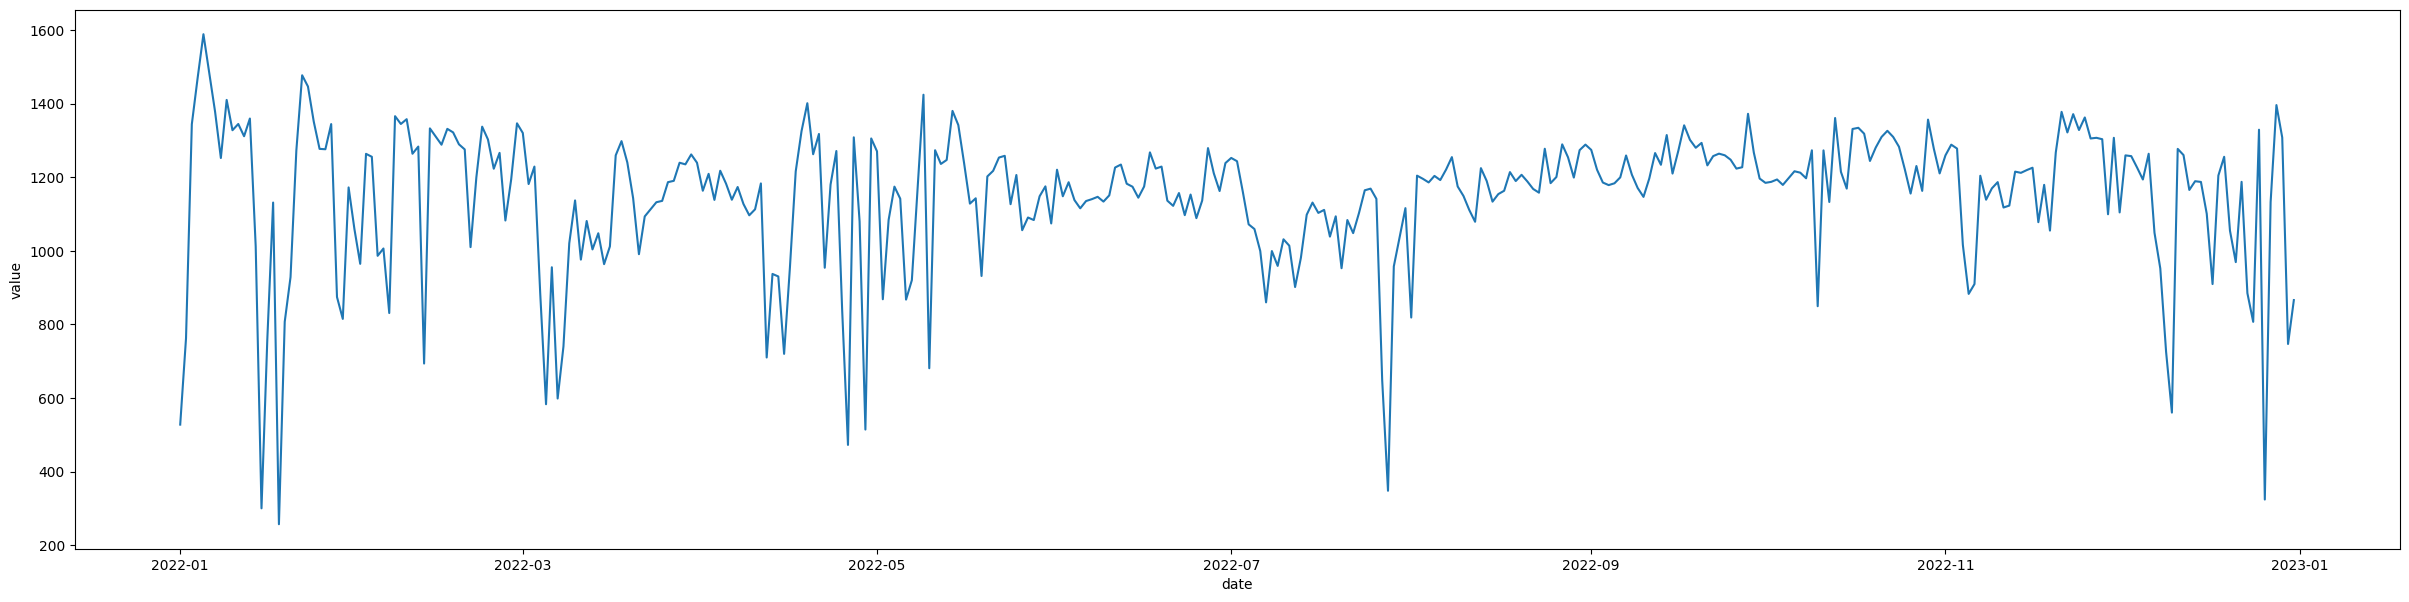

In [7]:
plt.figure(figsize=(30, 7))
sns.lineplot(data=solar, x='date', y='value')

### Daily Power Output (Wind)

<AxesSubplot: xlabel='date', ylabel='value'>

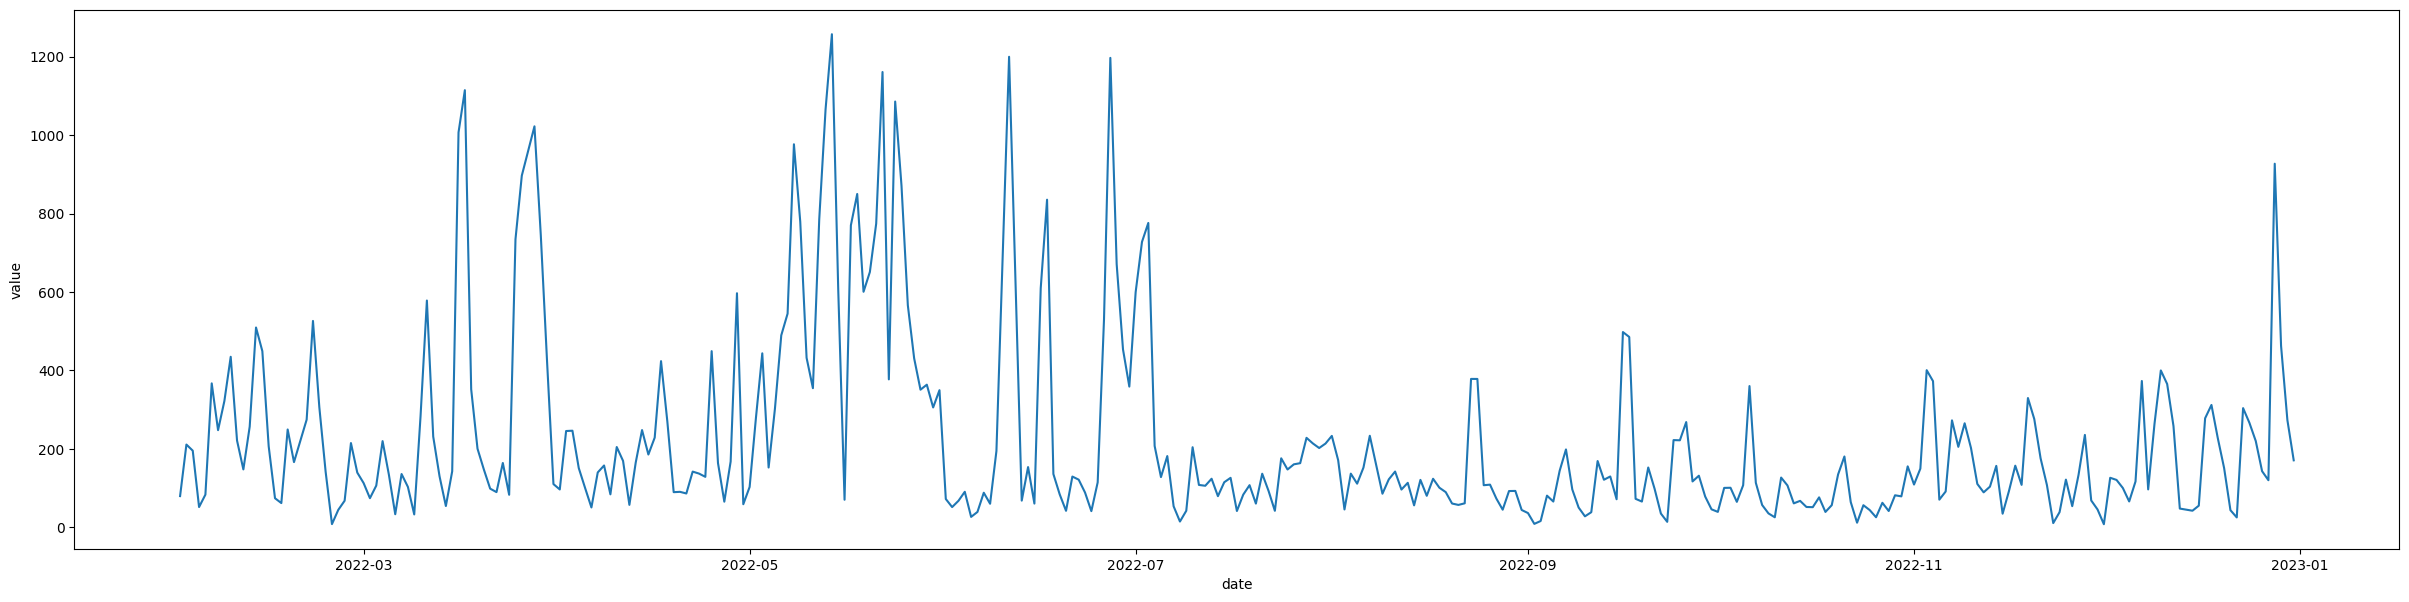

In [8]:
plt.figure(figsize=(30, 7))
sns.lineplot(data=wind, x='date', y='value')

### Weather Conditions (Monthly Basis)

#### Temperature (in Celcius)

<AxesSubplot: xlabel='month', ylabel='value'>

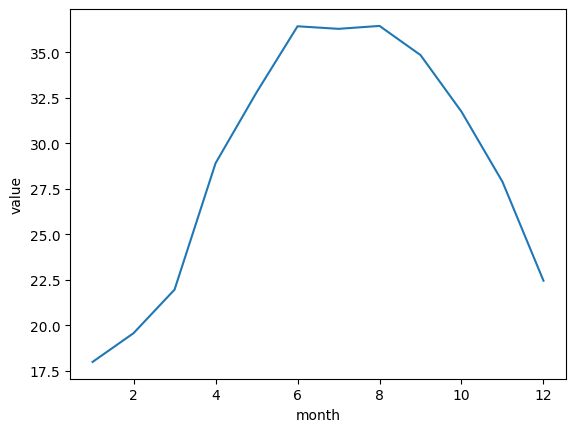

In [9]:
# plt.figure(figsize=(30, 7))
sns.lineplot(data=temp_monthly, x='month', y='value')

#### Wind Speed (m/s)

<AxesSubplot: xlabel='month', ylabel='value'>

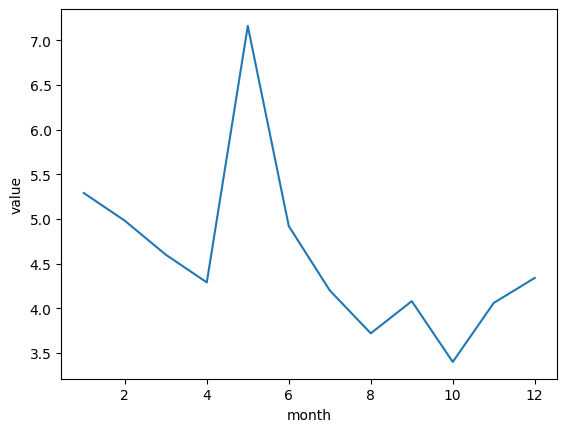

In [10]:
sns.lineplot(data=wind_speed_monthly, x='month', y='value')

#### Humidity (%)

<AxesSubplot: xlabel='month', ylabel='value'>

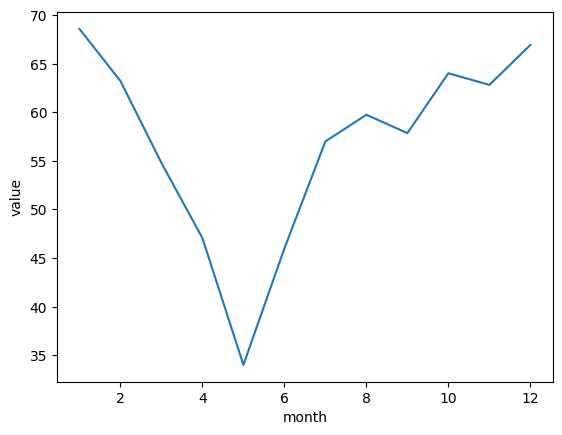

In [11]:
# plt.figure(figsize=(30, 7))
sns.lineplot(data=humidity_monthly, x='month', y='value')

## Combine Data

In [56]:
wind_renamed = wind.rename(columns={'value': 'wind_power'})
solar_renamed = solar.rename(columns={'value': 'solar_power'})
target_data = wind_renamed.merge(solar_renamed, how='outer', on='date')
target_data = target_data.sort_values('date').reset_index(drop=True)
target_data

,date,wind_power,solar_power
0,2022-01-01,NaN,527.55
1,2022-01-02,NaN,762.18
2,2022-01-03,NaN,1343.82
3,2022-01-04,NaN,1469.36
4,2022-01-05,NaN,1588.27
...,...,...,...
360,2022-12-27,120.22,1132.27
361,2022-12-28,926.98,1395.73
362,2022-12-29,462.69,1307.64
363,2022-12-30,273.46,746.64


Wind power data with & without interpolation

<AxesSubplot: xlabel='date', ylabel='wind_power'>

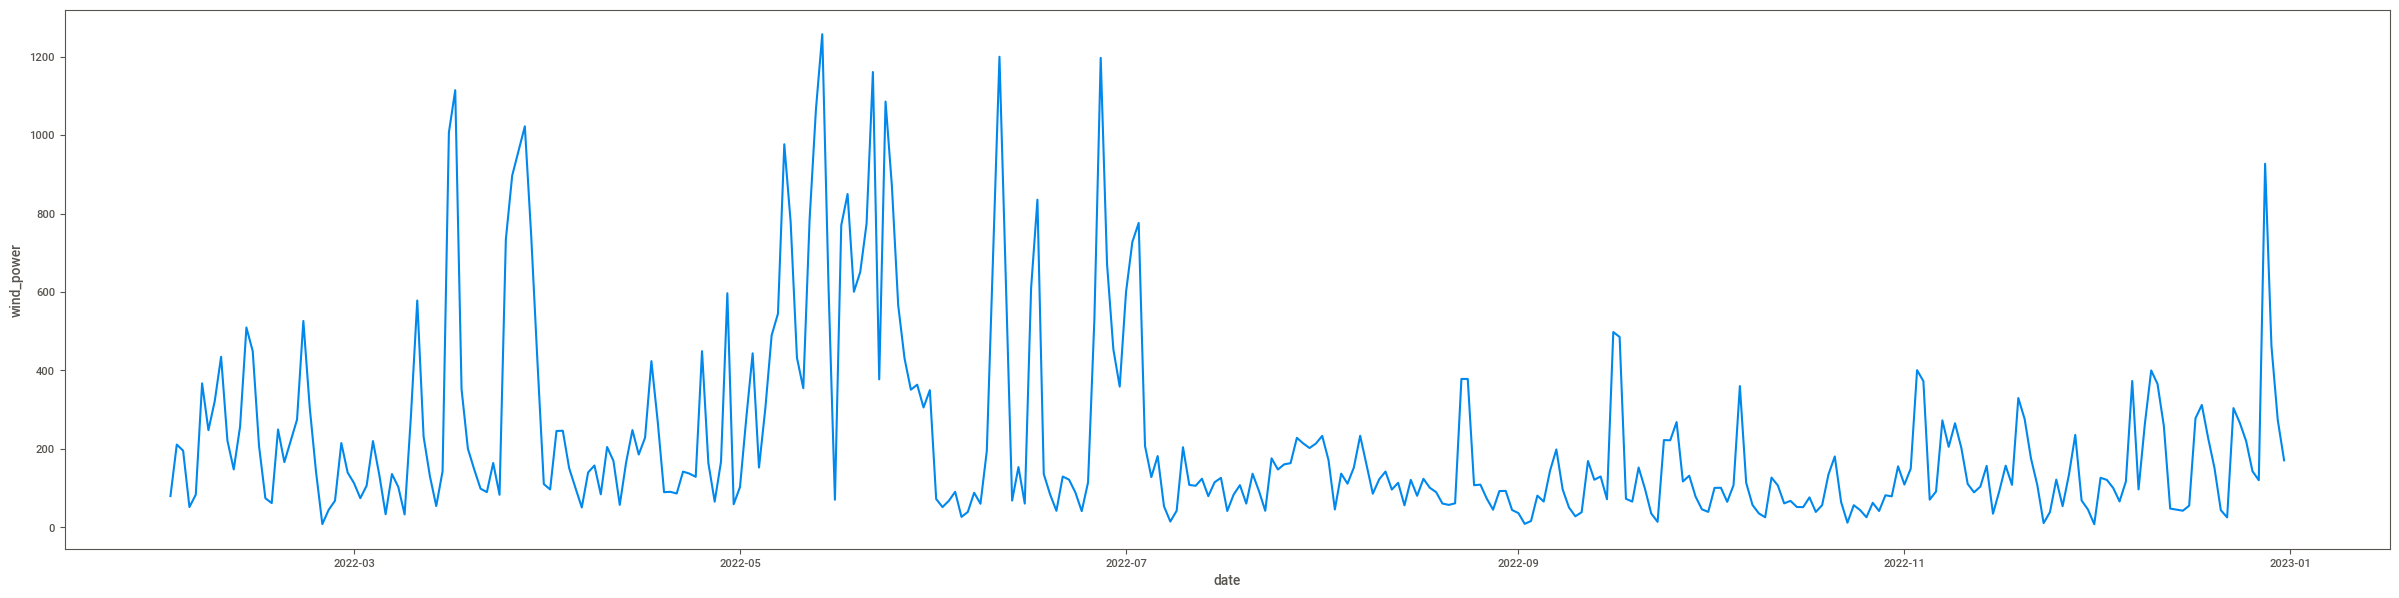

In [57]:
plt.figure(figsize=(30, 7))
sns.lineplot(target_data, x='date', y='wind_power')

<AxesSubplot: xlabel='date', ylabel='wind_power'>

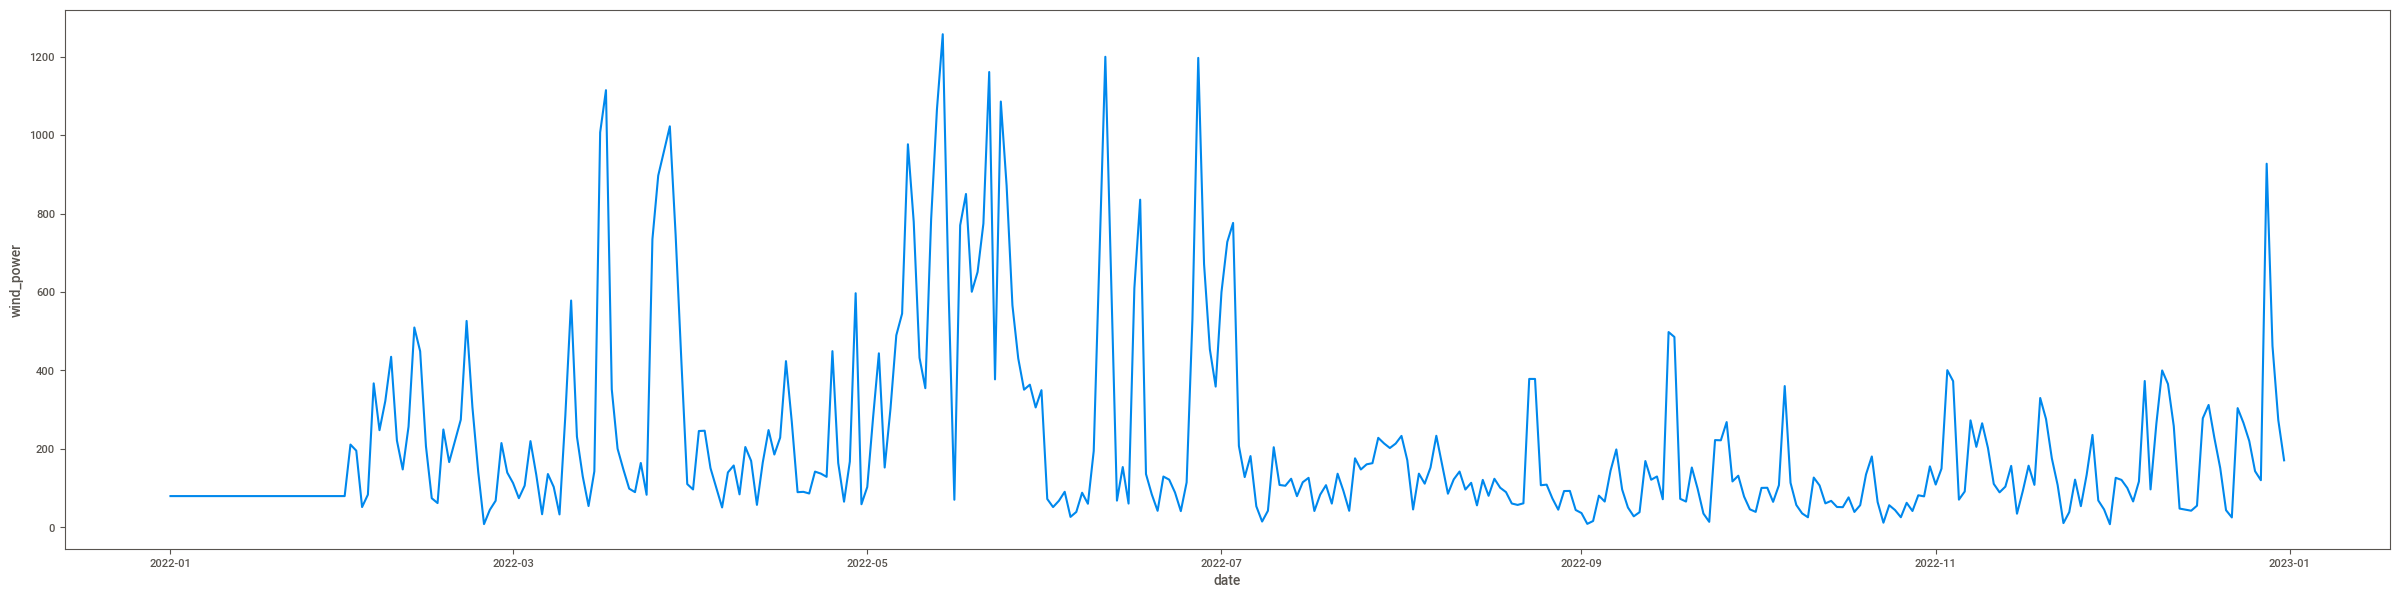

In [58]:
target_data.wind_power = target_data.wind_power.interpolate(limit_direction='both')
plt.figure(figsize=(30, 7))
sns.lineplot(target_data, x='date', y='wind_power')

## Correlation

What we will do now, is to find correlations between the weather variables and the power output (wind & solar). Considering that the weather conditions are only recorded once every month vs. the power output which is on a daily basis; we will approximate the daily weather measurements to the month's value i.e. if July had an average of 40 deg. celcius, then we will assume that every day of July had the same temperature.

*Before that however, let's combine these weather variables...*

In [59]:
target_data['month'] = target_data.date.dt.month
target_data

,date,wind_power,solar_power,month
0,2022-01-01,79.75,527.55,1
1,2022-01-02,79.75,762.18,1
2,2022-01-03,79.75,1343.82,1
3,2022-01-04,79.75,1469.36,1
4,2022-01-05,79.75,1588.27,1
...,...,...,...,...
360,2022-12-27,120.22,1132.27,12
361,2022-12-28,926.98,1395.73,12
362,2022-12-29,462.69,1307.64,12
363,2022-12-30,273.46,746.64,12


In [14]:
wind_speed_monthly_renamed = wind_speed_monthly.rename(columns={'value': 'wind_speed'})
humidity_monthly_renamed = humidity_monthly.rename(columns={'value': 'humidity'})
temp_monthly_renamed = temp_monthly.rename(columns={'value': 'temp'})

_ = target_data.merge(wind_speed_monthly_renamed, on='month', how='inner')
_ = _.merge(humidity_monthly_renamed, on='month', how='inner')
_ = _.merge(temp_monthly_renamed, on='month', how='inner')


merged_all = _.copy()
merged_all

,date,wind_power,solar_power,month,wind_speed,humidity,temp
0,2022-01-31,79.75,1059.08,1,5.29,68.57,17.99
1,2022-01-01,170.90,527.55,1,5.29,68.57,17.99
2,2022-01-02,170.90,762.18,1,5.29,68.57,17.99
3,2022-01-03,170.90,1343.82,1,5.29,68.57,17.99
4,2022-01-04,170.90,1469.36,1,5.29,68.57,17.99
...,...,...,...,...,...,...,...
360,2022-12-28,926.98,1395.73,12,4.34,66.92,22.45
361,2022-12-29,462.69,1307.64,12,4.34,66.92,22.45
362,2022-12-30,273.46,746.64,12,4.34,66.92,22.45
363,2022-12-31,170.90,865.91,12,4.34,66.92,22.45


<AxesSubplot: >

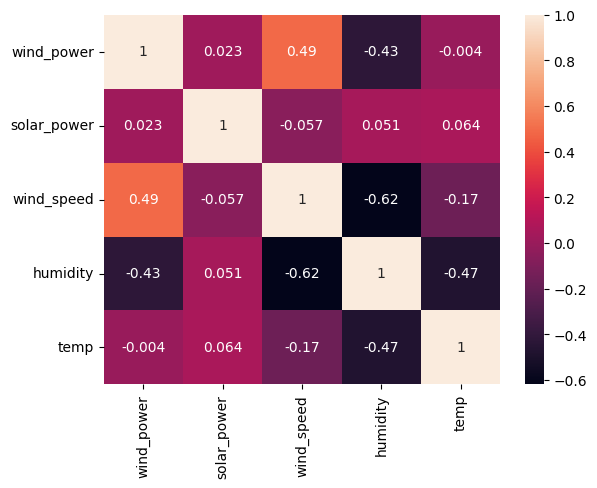

In [15]:
variables = ['wind_power', 'solar_power', 'wind_speed', 'humidity', 'temp']
corr = merged_all[variables].corr()
sns.heatmap(corr, annot=True)

## Sweetviz Package

In [16]:
import sweetviz as sv


/home/isa/.pyenv/versions/3.8.5/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:

analyze_report = sv.analyze([merged_all,'Wind Power Report'], 'wind_power')
analyze_report.show_html(layout='vertical')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Conclusion

We can tell from this report, that there are a few variables, mainly wind_speed and humidity that corrleate highly with wind_power. We can use these as predictors

In [18]:
analyze_report = sv.analyze([merged_all,'Solar Power Report'], 'solar_power')
analyze_report.show_html(layout='vertical')

Feature: solar_power (TARGET)                |█▎        | [ 12%]   00:00 -> (00:00 left)[0928/214540.998255:ERROR:file_io_posix.cc(152)] open /home/isa/.config/BraveSoftware/Brave-Browser/Crash Reports/pending/79105ea2-d2b6-452e-b74e-1e760c138fa8.lock: File exists (17)


Opening in existing browser session.


libva error: vaGetDriverNameByIndex() failed with unknown libva error, driver_name = (null)
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Conclusion

No suitable predictors can be found for solar_power. We don't attempt to build a model around it.

In [19]:
# sns.barplot(data=solar, x='day_name', y='value')

For our analysis in this notebook, we will assume that the solar panels are on the whole time of the day, considering that we lack the data for it.

Let's look at the months with the lowest amount of power output (i.e. lowest amount of sunlight)

In [20]:
# solar[solar.value<=solar.value.quantile(0.1)].month.value_counts()

In [21]:
external_weather_df = pd.read_csv('manama.csv')
external_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              365 non-null    object 
 1   datetime          365 non-null    object 
 2   tempmax           365 non-null    float64
 3   tempmin           365 non-null    float64
 4   temp              365 non-null    float64
 5   feelslikemax      365 non-null    float64
 6   feelslikemin      365 non-null    float64
 7   feelslike         365 non-null    float64
 8   dew               365 non-null    float64
 9   humidity          365 non-null    float64
 10  precip            365 non-null    float64
 11  precipprob        365 non-null    int64  
 12  precipcover       365 non-null    float64
 13  preciptype        26 non-null     object 
 14  snow              351 non-null    float64
 15  snowdepth         1 non-null      float64
 16  windgust          356 non-null    float64
 1

[0928/214546.226246:ERROR:file_io_posix.cc(152)] open /home/isa/.config/BraveSoftware/Brave-Browser/Crash Reports/pending/79105ea2-d2b6-452e-b74e-1e760c138fa8.lock: File exists (17)


In [22]:
external_weather_df.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [23]:
important_cols = ['datetime', 'temp', 'dew', 'humidity', 'precip', 'windspeed', 'winddir', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'sunrise', 'sunset']
external_weather_df[important_cols]

,datetime,temp,dew,humidity,precip,windspeed,winddir,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset
0,2022-01-01,19.4,16.4,82.8,15.9,27.5,55.0,10.2,127.7,11.2,6,2022-01-01T06:25:24,2022-01-01T16:57:07
1,2022-01-02,20.6,18.0,85.5,3.1,34.7,106.2,9.9,103.9,9.0,4,2022-01-02T06:25:40,2022-01-02T16:57:48
2,2022-01-03,18.2,13.9,76.5,0.0,24.2,298.7,7.4,175.2,15.2,7,2022-01-03T06:25:55,2022-01-03T16:58:29
3,2022-01-04,16.9,9.4,61.6,0.0,35.0,304.2,10.3,183.5,15.9,7,2022-01-04T06:26:08,2022-01-04T16:59:11
4,2022-01-05,15.3,4.7,49.4,0.0,33.3,301.1,11.5,190.6,16.5,7,2022-01-05T06:26:20,2022-01-05T16:59:53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2022-12-27,19.6,14.1,70.7,0.3,17.2,198.7,8.3,157.1,13.5,6,2022-12-27T06:23:39,2022-12-27T16:53:48
361,2022-12-28,17.6,10.4,63.1,0.1,46.2,306.0,9.9,127.9,10.9,6,2022-12-28T06:24:02,2022-12-28T16:54:24
362,2022-12-29,18.0,11.7,67.4,0.0,36.8,310.2,8.4,163.2,14.0,6,2022-12-29T06:24:23,2022-12-29T16:55:01
363,2022-12-30,18.1,11.4,65.2,0.0,25.7,305.8,10.1,123.2,10.7,5,2022-12-30T06:24:44,2022-12-30T16:55:39


In [24]:
external_weather_df['stations'].value_counts()

OEDR,41150099999,40416099999,OBBI         270
OEDR,41150099999,40416099999,WLPI,OBBI     95
Name: stations, dtype: int64

In [27]:
target_data.mer

,date,wind_power,solar_power,month
0,2022-01-31,79.75,1059.08,1
1,2022-02-01,211.10,964.42,2
2,2022-02-02,195.53,1263.25,2
3,2022-02-03,51.82,1255.25,2
4,2022-02-04,83.44,986.17,2
...,...,...,...,...
360,2022-01-28,170.90,874.25,1
361,2022-01-29,170.90,814.83,1
362,2022-01-30,170.90,1172.00,1
363,2022-02-19,170.90,1275.25,2
